In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#read the data
cars = pd.read_csv(r"C:\Users\jagad\Downloads\Cars_ad.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()#check for the missing values

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [6]:
cars.shape

(81, 5)

## EDA

In [8]:
import warnings 
warnings.filterwarnings('ignore')


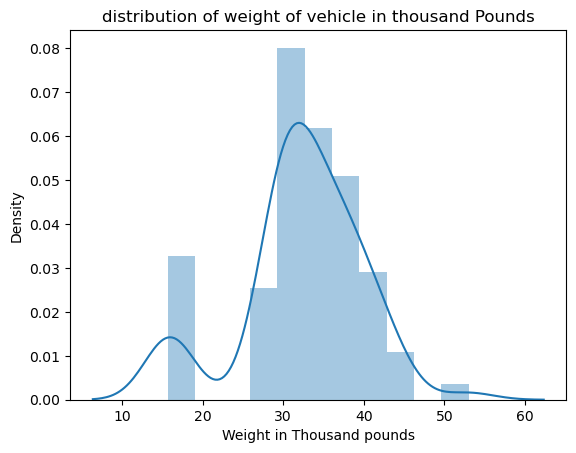

In [9]:
sns.distplot(x=cars['WT'])
plt.title('distribution of weight of vehicle in thousand Pounds')
plt.xlabel('Weight in Thousand pounds')
plt.show()

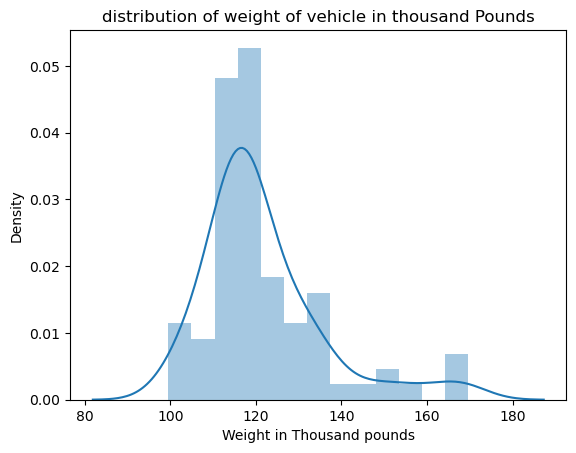

In [10]:
sns.distplot(x=cars['SP'])
plt.title('distribution of weight of vehicle in thousand Pounds')
plt.xlabel('Weight in Thousand pounds')
plt.show()

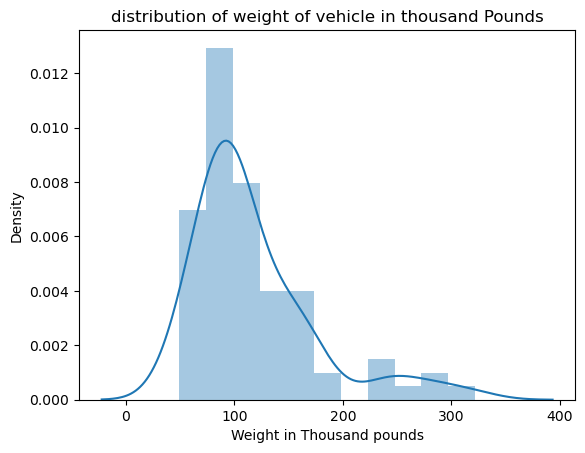

In [11]:
sns.distplot(x=cars['HP'])
plt.title('distribution of weight of vehicle in thousand Pounds')
plt.xlabel('Weight in Thousand pounds')
plt.show()

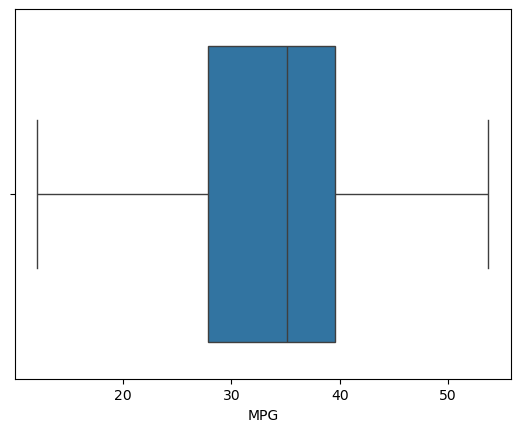

In [12]:
sns.boxplot(x=cars['MPG'])#outliers
plt.show()
            

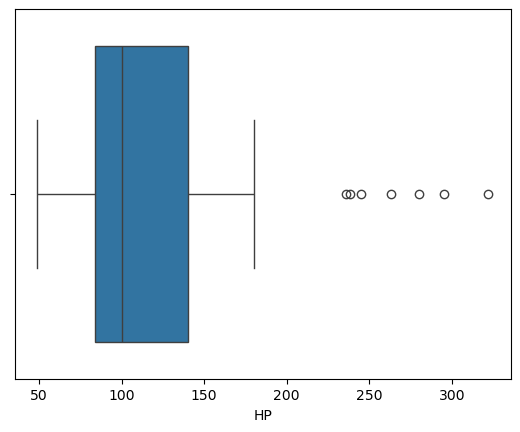

In [13]:
sns.boxplot(x=cars['HP'])
plt.show()
            

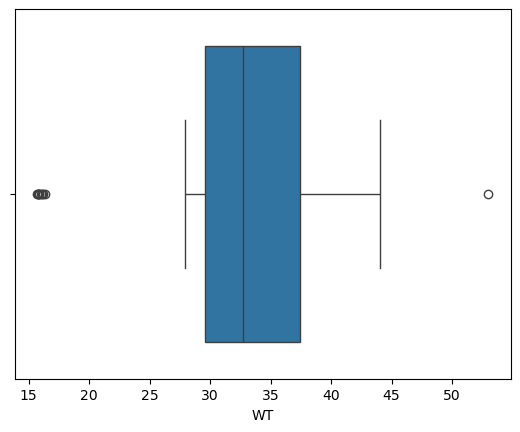

In [14]:
sns.boxplot(x=cars['WT'])
plt.show()
            

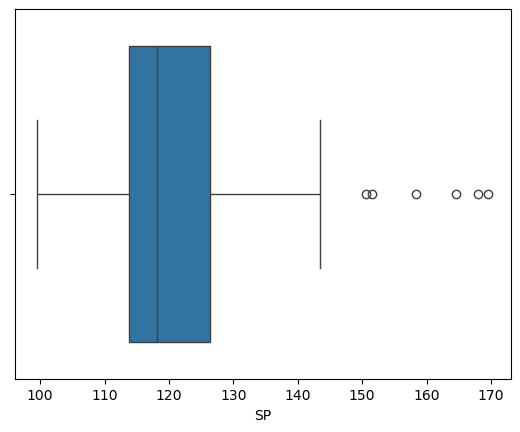

In [15]:
sns.boxplot(x=cars['SP'])
plt.show()
            

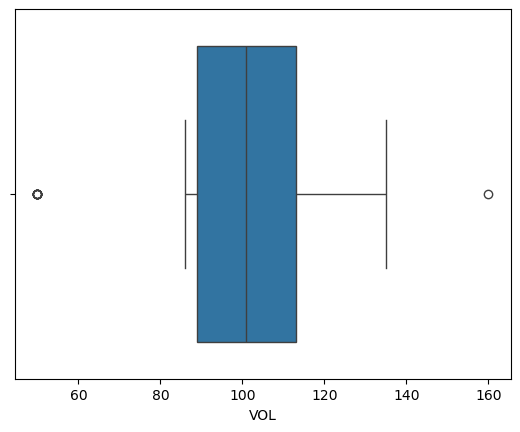

In [16]:
sns.boxplot(x=cars['VOL'])
plt.show()
            

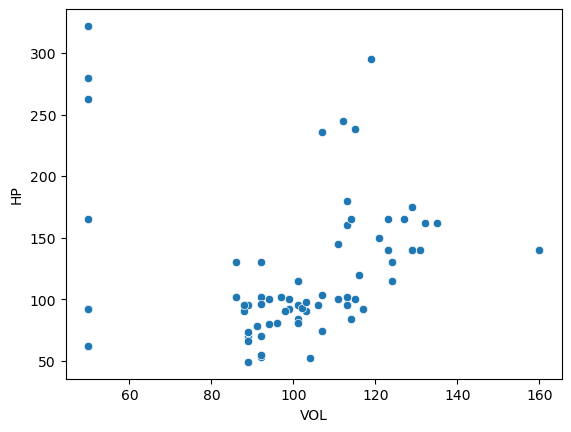

In [17]:
sns.scatterplot(x=cars['VOL'],y=cars['HP'])
plt.show()

<Axes: xlabel='HP', ylabel='SP'>

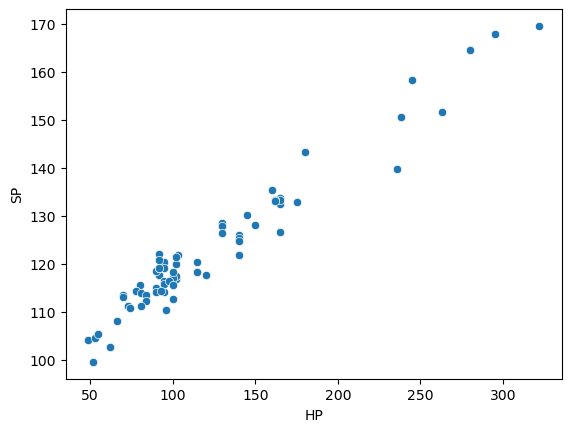

In [18]:
sns.scatterplot(x=cars['HP'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='MPG'>

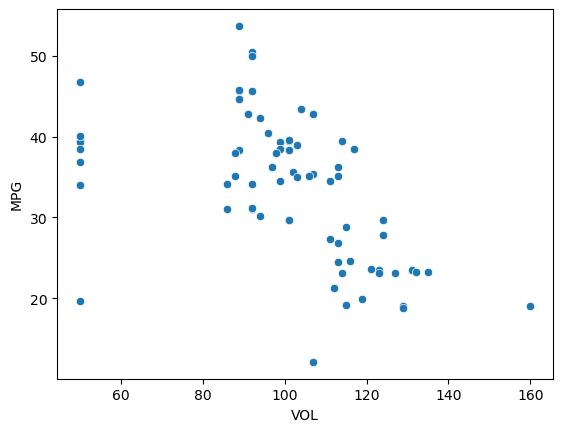

In [19]:
sns.scatterplot(x=cars['VOL'],y=cars['MPG'])

<Axes: xlabel='SP', ylabel='MPG'>

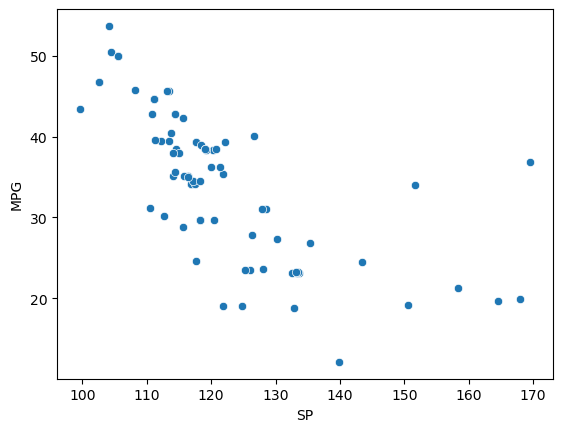

In [20]:
sns.scatterplot(x=cars['SP'],y=cars['MPG'])



# Correlation Matrix

In [22]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: xlabel='HP', ylabel='VOL'>

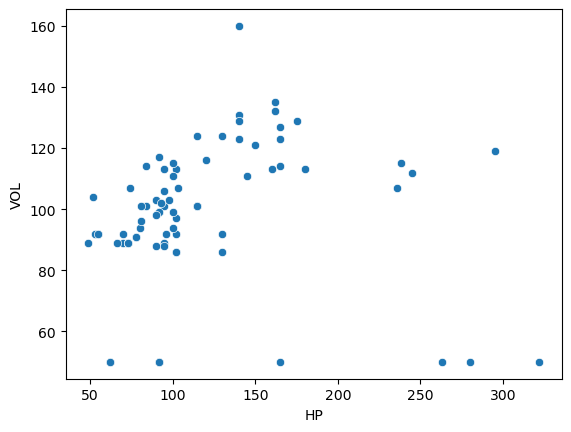

In [23]:
sns.scatterplot(x=cars['HP'],y=cars['VOL'])

<Axes: xlabel='HP', ylabel='WT'>

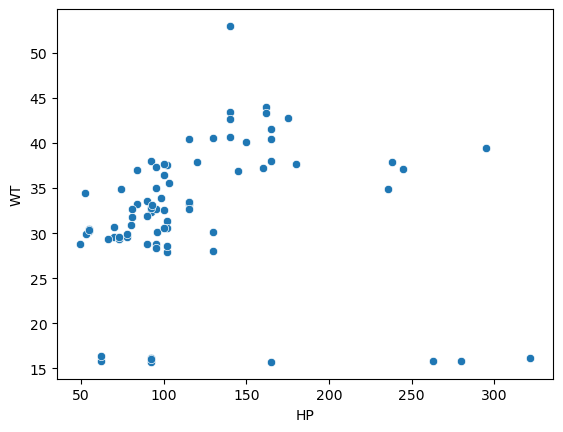

In [24]:
sns.scatterplot(x=cars['HP'],y=cars['WT'])

<Axes: xlabel='HP', ylabel='SP'>

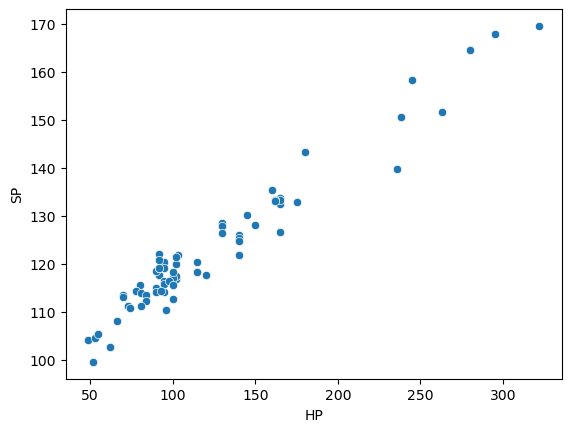

In [25]:
sns.scatterplot(x=cars['HP'],y=cars['SP'])

<Axes: xlabel='WT', ylabel='VOL'>

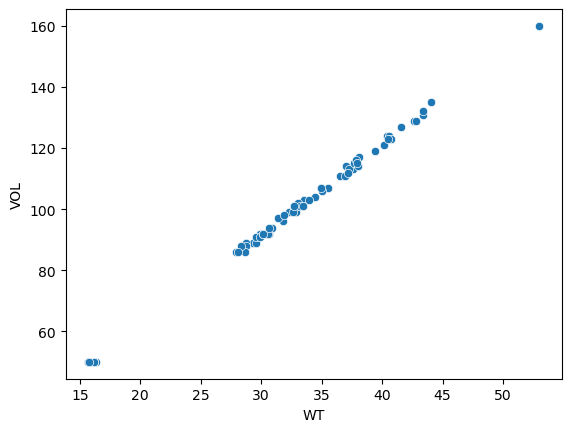

In [26]:
sns.scatterplot(x=cars['WT'],y=cars['VOL'])

<Axes: xlabel='WT', ylabel='SP'>

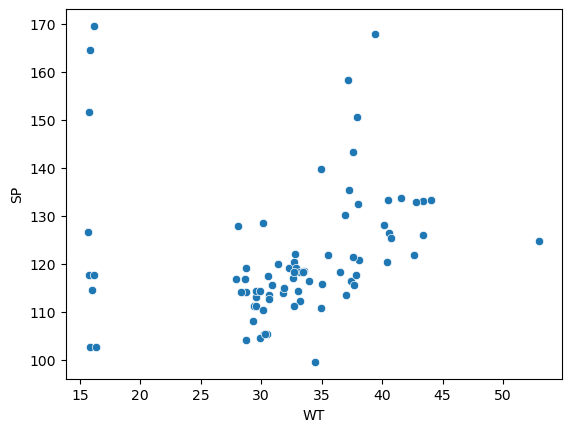

In [27]:
sns.scatterplot(x=cars['WT'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='SP'>

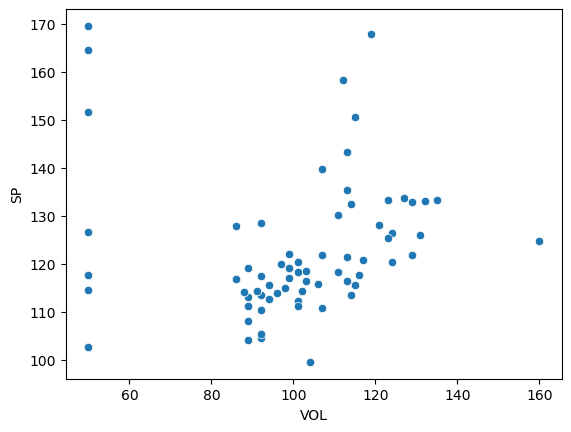

In [28]:
sns.scatterplot(x=cars['VOL'],y=cars['SP'])

<Axes: xlabel='SP', ylabel='WT'>

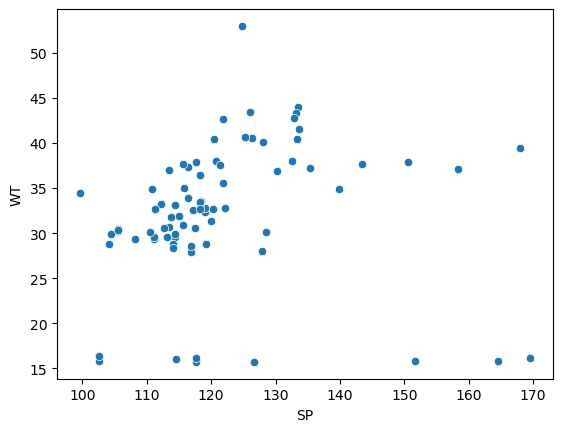

In [29]:
sns.scatterplot(x=cars['SP'],y=cars['WT'])


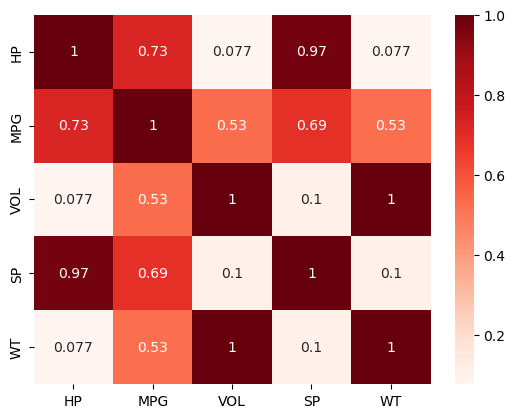

In [30]:
sns.heatmap(np.abs(cars.corr()),cmap='Reds',annot=True)
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','WT','VOL','SP']]=sc.fit_transform(cars[['HP','WT','VOL','SP']])

In [69]:
#we have to apply scalling techniques for numerical  

In [71]:
np.round(cars.describe(),2)

,HP,MPG,VOL,SP,WT
count,81.00,81.00,81.00,81.00,81.00
mean,-0.00,34.42,0.00,0.00,0.00
std,1.01,9.13,1.01,1.01,1.01
min,-1.21,12.10,-2.20,-1.56,-2.24
25%,-0.59,27.86,-0.44,-0.55,-0.38
50%,-0.31,35.15,0.10,-0.24,0.04
75%,0.40,39.53,0.64,0.35,0.67
max,3.60,53.70,2.76,3.41,2.76


### Simple Linear Regression Models

In [97]:
import statsmodels.formula.api as smf
ml_vol=smf.ols('MPG~VOL',data = cars).fit()
np.round(ml_vol.rsquared,2)

0.28

In [99]:
ml_vol.params

Intercept    34.422076
VOL          -4.801137
dtype: float64

In [119]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
ml_w.rsquared

0.2774751389270127

In [121]:
ml_W=smf.ols('WT~MPG',data = cars).fit()
ml_W.rsquared

0.27747513892701237

In [123]:
ml_v=smf.ols('WT~VOL',data = cars).fit()
ml_v.rsquared

0.9984067954549005

In [125]:
ml_v.params

Intercept    2.775558e-17
VOL          9.992031e-01
dtype: float64

In [127]:
ml_h=smf.ols('SP~HP',data = cars).fit()
np.round(ml_h.rsquared,2)

0.95

In [129]:
ml_h.params

Intercept    3.989864e-17
HP           9.738481e-01
dtype: float64

In [145]:
#build model
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model.rsquared

0.7705372737359844

In [147]:
model.params #parameters

Intercept    34.422076
WT            2.982842
VOL          -7.448031
SP            5.575816
HP          -11.660955
dtype: float64

In [153]:
ml_vol.params

Intercept    34.422076
VOL          -4.801137
dtype: float64